In [1]:
!pip install statsmodels



[notice] A new release of pip is available: 24.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from datetime import datetime, timedelta

# === Wczytanie danych ===
monthly_df = pd.read_csv("warsaw_weather_monthly.csv", parse_dates=["time"])
weekly_df = pd.read_csv("warsaw_weather_weekly.csv", parse_dates=["time"])
hourly_df = pd.read_csv("warsaw_weather_hourly.csv", parse_dates=["time"])

# === Sortowanie danych ===
monthly_df = monthly_df.sort_values("time")
weekly_df = weekly_df.sort_values("time")
hourly_df = hourly_df.sort_values("time")


c:\Users\supaz\PycharmProjects\pythonProject2\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


c:\Users\supaz\PycharmProjects\pythonProject2\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\supaz\PycharmProjects\pythonProject2\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\supaz\PycharmProjects\pythonProject2\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\supaz\PycharmProjects\pythonProject2\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\supaz\PycharmProjects\pythonProject2\venv\lib\site-packages\sta

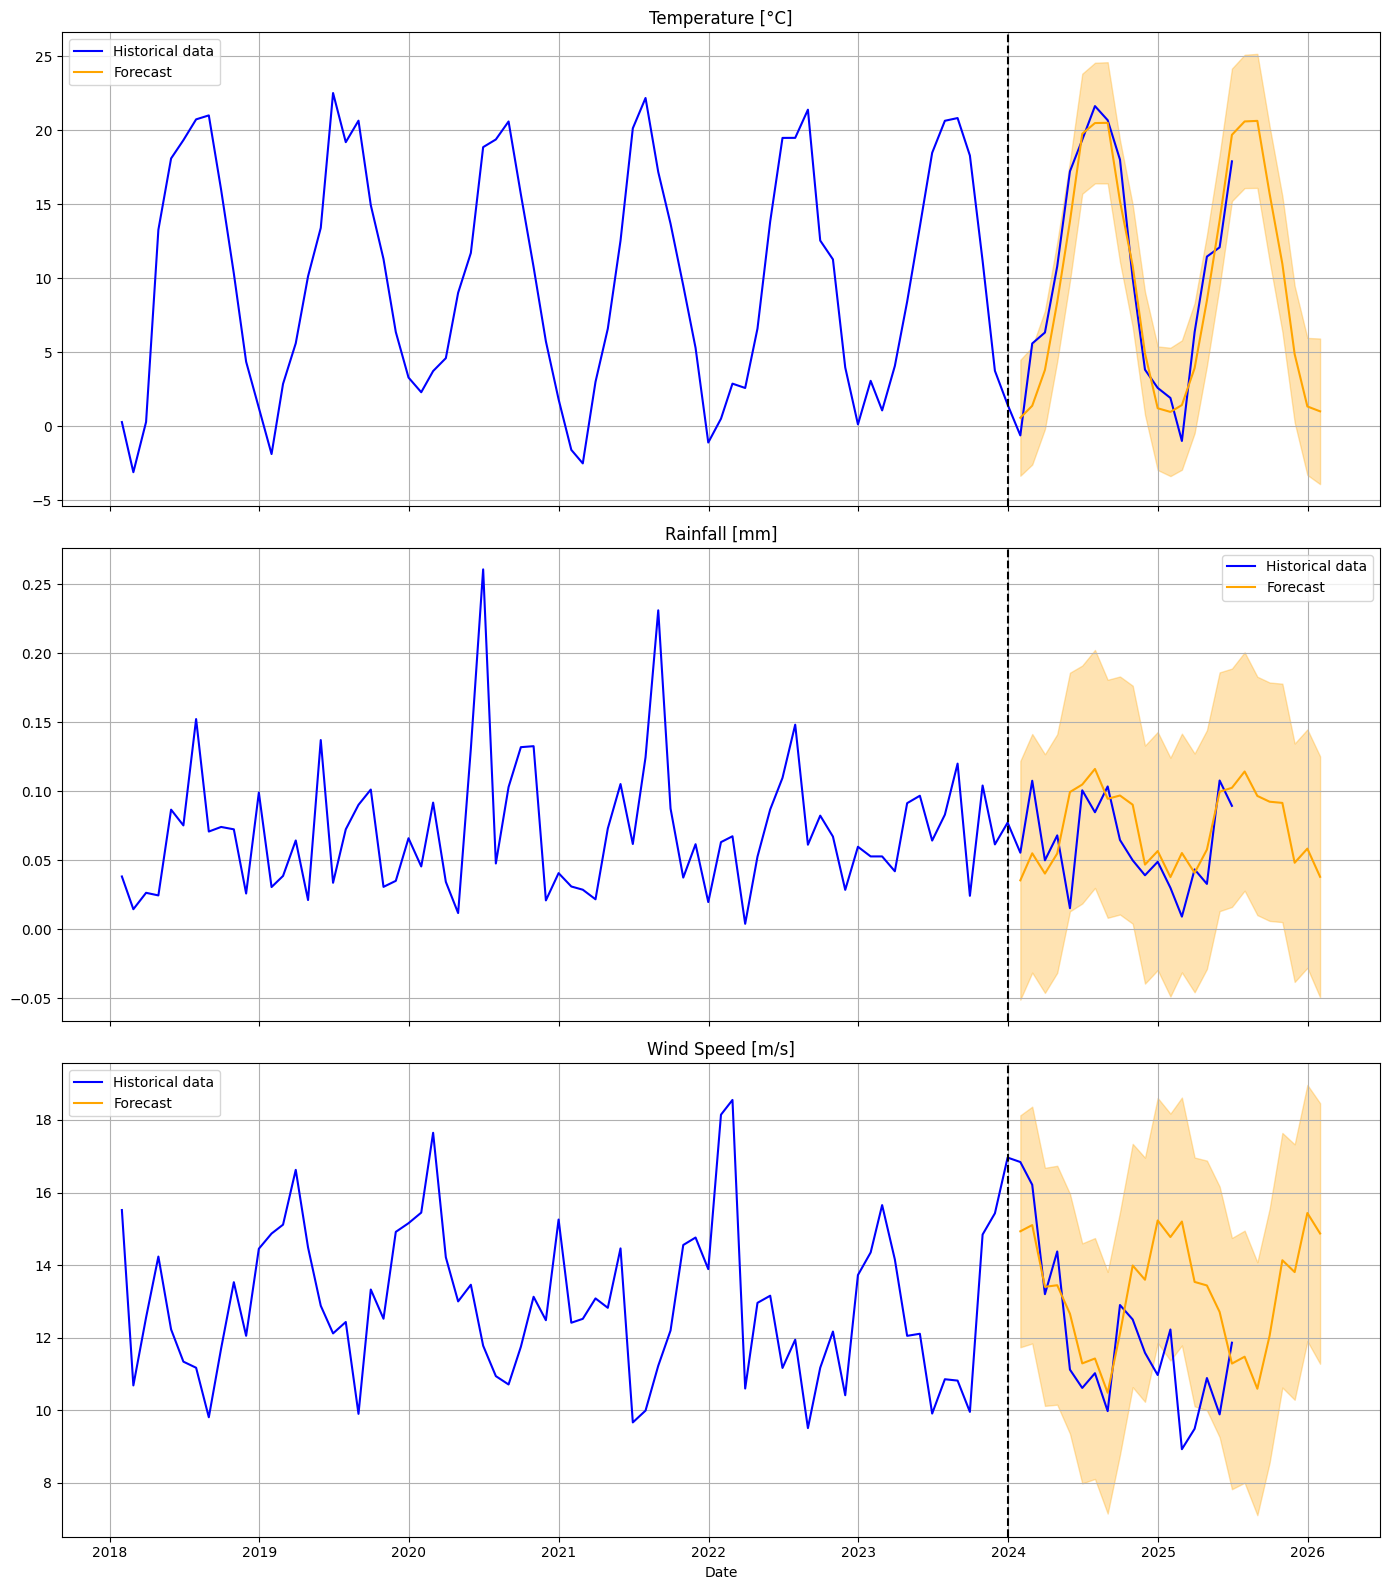

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load data
monthly_df = pd.read_csv("warsaw_weather_monthly.csv", parse_dates=["time"])
monthly_df = monthly_df.sort_values("time")
monthly_df.set_index("time", inplace=True)

# Plot and forecast parameters
start_plot = pd.Timestamp('2018-01-01')
start_forecast = pd.Timestamp('2024-01-01')
end_forecast = start_forecast + pd.DateOffset(years=2)

# Function to train SARIMAX model and return forecast
def forecast_series(ts, order=(1,1,1), seasonal_order=(1,1,1,12)):
    train_ts = ts[ts.index < start_forecast]
    model = SARIMAX(train_ts, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    pred = model_fit.get_prediction(start=start_forecast, end=end_forecast, dynamic=False)
    return pred

# Forecast for temperature, rainfall, and wind speed
pred_temp = forecast_series(monthly_df['temperature_2m'])
pred_rain = forecast_series(monthly_df['rain'])
pred_wind = forecast_series(monthly_df['wind_speed_10m'])

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(14, 16), sharex=True)

# Temperature plot
axs[0].plot(monthly_df['temperature_2m'][start_plot:], label='Historical data', color='blue')
axs[0].plot(pred_temp.predicted_mean.index, pred_temp.predicted_mean, label='Forecast', color='orange')
ci_temp = pred_temp.conf_int()
axs[0].fill_between(ci_temp.index, ci_temp.iloc[:, 0], ci_temp.iloc[:, 1], color='orange', alpha=0.3)
axs[0].axvline(start_forecast, color='black', linestyle='--')
axs[0].set_title("Temperature [°C]")
axs[0].legend()
axs[0].grid(True)

# Rainfall plot
axs[1].plot(monthly_df['rain'][start_plot:], label='Historical data', color='blue')
axs[1].plot(pred_rain.predicted_mean.index, pred_rain.predicted_mean, label='Forecast', color='orange')
ci_rain = pred_rain.conf_int()
axs[1].fill_between(ci_rain.index, ci_rain.iloc[:, 0], ci_rain.iloc[:, 1], color='orange', alpha=0.3)
axs[1].axvline(start_forecast, color='black', linestyle='--')
axs[1].set_title("Rainfall [mm]")
axs[1].legend()
axs[1].grid(True)

# Wind speed plot
axs[2].plot(monthly_df['wind_speed_10m'][start_plot:], label='Historical data', color='blue')
axs[2].plot(pred_wind.predicted_mean.index, pred_wind.predicted_mean, label='Forecast', color='orange')
ci_wind = pred_wind.conf_int()
axs[2].fill_between(ci_wind.index, ci_wind.iloc[:, 0], ci_wind.iloc[:, 1], color='orange', alpha=0.3)
axs[2].axvline(start_forecast, color='black', linestyle='--')
axs[2].set_title("Wind Speed [m/s]")
axs[2].legend()
axs[2].grid(True)

plt.xlabel("Date")
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load weekly weather data
weekly_df = pd.read_csv("warsaw_weather_weekly.csv", parse_dates=["time"])
weekly_df = weekly_df.sort_values("time")
weekly_df.set_index("time", inplace=True)

# Parameters
train_end_date = '2025-05-31'
plot_start = pd.Timestamp('2025-04-01')
forecast_start = pd.to_datetime(train_end_date) + pd.Timedelta(weeks=1)
forecast_end = forecast_start + pd.Timedelta(weeks=12)  # 13 weeks forecast

# Function to fit SARIMAX model and generate forecast
def fit_sarima_and_forecast(series, order=(1,1,1), seasonal_order=(1,1,1,52)):
    train = series[series.index <= train_end_date]
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    fit = model.fit(disp=False)
    pred = fit.get_prediction(start=forecast_start, end=forecast_end, dynamic=False)
    return fit, pred

# Fit models and generate forecasts
pred_temp = fit_sarima_and_forecast(weekly_df['temperature_2m'])[1]
pred_rain = fit_sarima_and_forecast(weekly_df['rain'])[1]
pred_wind = fit_sarima_and_forecast(weekly_df['wind_speed_10m'])[1]

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(14, 15), sharex=True)

# Temperature
axs[0].plot(weekly_df.loc[plot_start:, 'temperature_2m'], label='Historical data', color='blue')
axs[0].plot(pred_temp.predicted_mean.index, pred_temp.predicted_mean, label='Forecast', color='orange')
ci_temp = pred_temp.conf_int()
axs[0].fill_between(ci_temp.index, ci_temp.iloc[:, 0], ci_temp.iloc[:, 1], color='orange', alpha=0.3)
axs[0].axvline(forecast_start, color='black', linestyle='--', label='Forecast start')
axs[0].set_title('Weekly Temperature [°C]')
axs[0].legend()
axs[0].grid(True)

# Rainfall
axs[1].plot(weekly_df.loc[plot_start:, 'rain'], label='Historical data', color='blue')
axs[1].plot(pred_rain.predicted_mean.index, pred_rain.predicted_mean, label='Forecast', color='orange')
ci_rain = pred_rain.conf_int()
axs[1].fill_between(ci_rain.index, ci_rain.iloc[:, 0], ci_rain.iloc[:, 1], color='orange', alpha=0.3)
axs[1].axvline(forecast_start, color='black', linestyle='--')
axs[1].set_title('Weekly Rainfall [mm]')
axs[1].legend()
axs[1].grid(True)

# Wind speed
axs[2].plot(weekly_df.loc[plot_start:, 'wind_speed_10m'], label='Historical data', color='blue')
axs[2].plot(pred_wind.predicted_mean.index, pred_wind.predicted_mean, label='Forecast', color='orange')
ci_wind = pred_wind.conf_int()
axs[2].fill_between(ci_wind.index, ci_wind.iloc[:, 0], ci_wind.iloc[:, 1], color='orange', alpha=0.3)
axs[2].axvline(forecast_start, color='black', linestyle='--')
axs[2].set_title('Weekly Wind Speed[m/s]')
axs[2].legend()
axs[2].grid(True)

plt.xlabel("Date")
plt.tight_layout()
plt.show()



c:\Users\supaz\PycharmProjects\pythonProject2\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\supaz\PycharmProjects\pythonProject2\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\supaz\PycharmProjects\pythonProject2\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\supaz\PycharmProjects\pythonProject2\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load hourly weather data
hourly_df = pd.read_csv("warsaw_weather_hourly.csv", parse_dates=["time"])
hourly_df = hourly_df.sort_values("time")
hourly_df.set_index("time", inplace=True)

# Use the last year of data for training
last_year = hourly_df.index.max() - pd.Timedelta(days=365)

# Forecasting function
def sarima_forecast(series, order=(1,2,1), seasonal_order=(1,1,1,24), forecast_start=None, forecast_end=None):
    train_data = series[series.index >= last_year]
    model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    pred = model_fit.get_prediction(start=forecast_start, end=forecast_end, dynamic=False)
    return pred

# Define time ranges
plot_start = pd.Timestamp('2025-06-10 00:00:00')
plot_end = pd.Timestamp('2025-06-24 23:00:00')
forecast_start = pd.Timestamp('2025-06-17 00:00:00')
forecast_end = pd.Timestamp('2025-06-26 23:00:00')

# Forecast for all three variables
pred_temp = sarima_forecast(hourly_df['temperature_2m'], forecast_start=forecast_start, forecast_end=forecast_end)
pred_rain = sarima_forecast(hourly_df['rain'], forecast_start=forecast_start, forecast_end=forecast_end)
pred_wind = sarima_forecast(hourly_df['wind_speed_10m'], forecast_start=forecast_start, forecast_end=forecast_end)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(16, 14), sharex=True)

# Temperature
axs[0].plot(hourly_df.loc[plot_start:plot_end, 'temperature_2m'], label='Historical data', color='blue')
axs[0].plot(pred_temp.predicted_mean.index, pred_temp.predicted_mean, label='Forecast', color='orange')
ci_temp = pred_temp.conf_int()
axs[0].fill_between(ci_temp.index, ci_temp.iloc[:, 0], ci_temp.iloc[:, 1], color='orange', alpha=0.3)
axs[0].axvline(forecast_start, color='black', linestyle='--', label='Forecast start')
axs[0].set_title("Hourly Temperature [°C]")
axs[0].legend()
axs[0].grid(True)

# Rainfall
axs[1].plot(hourly_df.loc[plot_start:plot_end, 'rain'], label='Historical data', color='blue')
axs[1].plot(pred_rain.predicted_mean.index, pred_rain.predicted_mean, label='Forecast', color='orange')
ci_rain = pred_rain.conf_int()
axs[1].fill_between(ci_rain.index, ci_rain.iloc[:, 0], ci_rain.iloc[:, 1], color='orange', alpha=0.3)
axs[1].axvline(forecast_start, color='black', linestyle='--')
axs[1].set_title("Hourly Rainfall [mm]")
axs[1].legend()
axs[1].grid(True)

# Wind speed
axs[2].plot(hourly_df.loc[plot_start:plot_end, 'wind_speed_10m'], label='Historical data', color='blue')
axs[2].plot(pred_wind.predicted_mean.index, pred_wind.predicted_mean, label='Forecast', color='orange')
ci_wind = pred_wind.conf_int()
axs[2].fill_between(ci_wind.index, ci_wind.iloc[:, 0], ci_wind.iloc[:, 1], color='orange', alpha=0.3)
axs[2].axvline(forecast_start, color='black', linestyle='--')
axs[2].set_title("Hourly Wind Speed[m/s]")
axs[2].legend()
axs[2].grid(True)

plt.xlabel("Date and Hour")
plt.tight_layout()
plt.show()



c:\Users\supaz\PycharmProjects\pythonProject2\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\supaz\PycharmProjects\pythonProject2\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


KeyboardInterrupt: 